# IMDB data - exploratory analyis

In this notebook we look at what information can be leveraged from the open IMDB data. In this first step, we are after some first movie recommendations based on the average rating and a minimum amount of received votes

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

title_basics=pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t', error_bad_lines=False, index_col=False, dtype='unicode')
print('Successfully loaded title_basics')

title_akas=pd.read_csv('https://datasets.imdbws.com/title.akas.tsv.gz', sep='\t', error_bad_lines=False, index_col=False, dtype='unicode')
print('Successfully loaded title_akas')

title_ratings=pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep='\t', error_bad_lines=False, index_col=False, dtype='unicode')
print('Successfully loaded title_ratings')

title_rated=title_basics.merge(title_akas, left_on='tconst', right_on='titleId')
title_rated=title_rated.merge(title_ratings, left_on='tconst', right_on='tconst')
title_rated['startYear_int']=pd.to_numeric(title_rated['startYear'], errors='coerce')

title_rated['concat_region_lang']=title_rated['region']+' '+title_rated['language']

title_rated.head()

Successfully loaded title_basics
Successfully loaded title_akas
Successfully loaded title_ratings


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes,startYear_int,concat_region_lang
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0,5.7,1881,1894.0,UA \N
1,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,2,Carmencita,DE,\N,\N,literal title,0,5.7,1881,1894.0,DE \N
2,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,5.7,1881,1894.0,HU \N
3,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0,5.7,1881,1894.0,GR \N
4,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0,5.7,1881,1894.0,RU \N


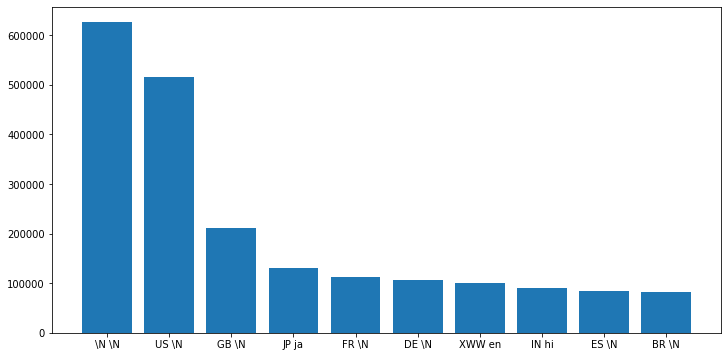

In [5]:
agg_region=title_rated[['numVotes','concat_region_lang']].groupby('concat_region_lang').count().sort_values('numVotes', ascending=False).head(10)
agg_region=agg_region.reset_index()

plt.figure(figsize=(12, 6))
plt.bar(agg_region.concat_region_lang,agg_region.numVotes)
plt.show()

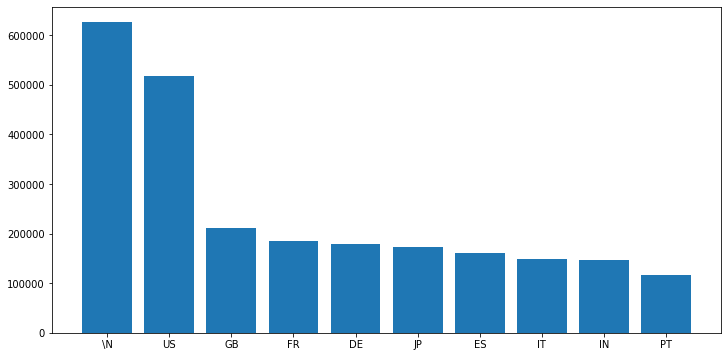

In [6]:
agg_region=title_rated[['numVotes','region']].groupby('region').count().sort_values('numVotes', ascending=False).head(10)
agg_region=agg_region.reset_index()

plt.figure(figsize=(12, 6))
plt.bar(agg_region.region,agg_region.numVotes)
plt.show()

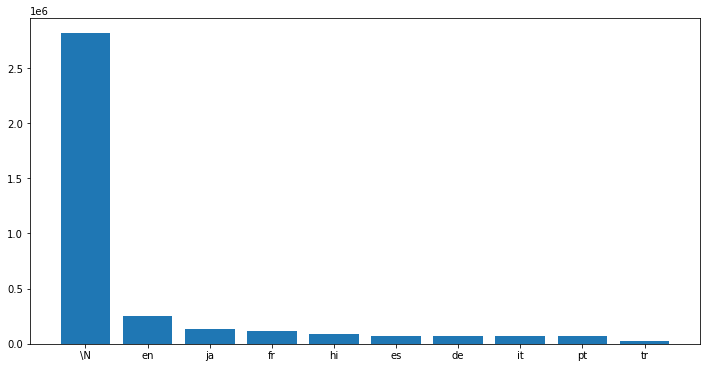

In [7]:
agg_region=title_rated[['numVotes','language']].groupby('language').count().sort_values('numVotes', ascending=False).head(10)
agg_region=agg_region.reset_index()

plt.figure(figsize=(12, 6))
plt.bar(agg_region.language,agg_region.numVotes)
plt.show()

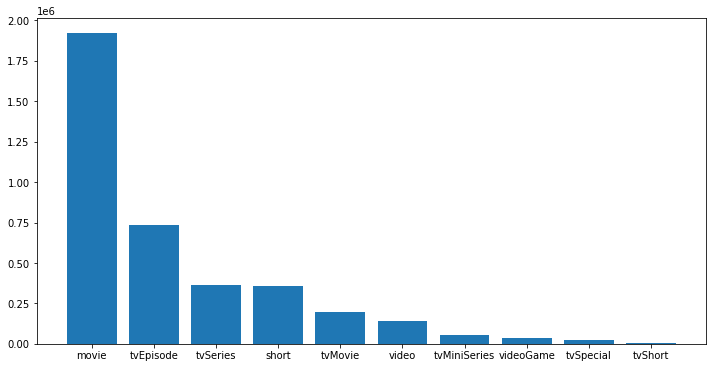

In [8]:
agg_region=title_rated[['numVotes','titleType']].groupby('titleType').count().sort_values('numVotes', ascending=False).head(10)
agg_region=agg_region.reset_index()

plt.figure(figsize=(12, 6))
plt.bar(agg_region.titleType,agg_region.numVotes)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Glyph 2 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


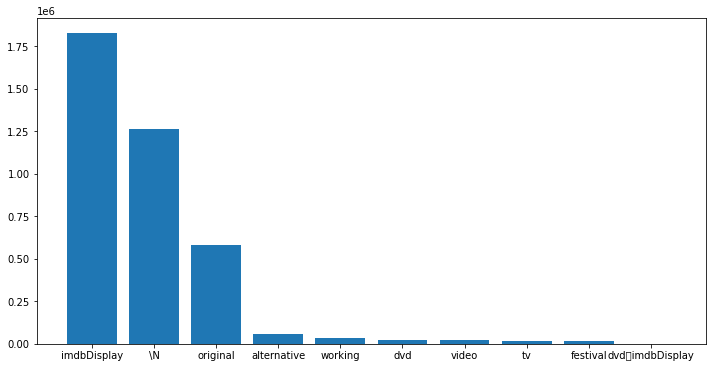

In [9]:

agg_region=title_rated[['numVotes','types']].groupby('types').count().sort_values('numVotes', ascending=False).head(10)
agg_region=agg_region.reset_index()

plt.figure(figsize=(12, 6))
plt.bar(agg_region.types,agg_region.numVotes)
plt.show()

## What are the most common movie genres?

In [11]:
genre_dict={}

movies=title_rated[title_rated['titleType']=='movie']

for index,movie in movies.iterrows():
    movie_genres_list=movie['genres'].split (",")
    for item in movie_genres_list:
        if genre_dict.get(item) is not None:
            genre_dict[item]=genre_dict[item]+1
        else:
            genre_dict[item]=1

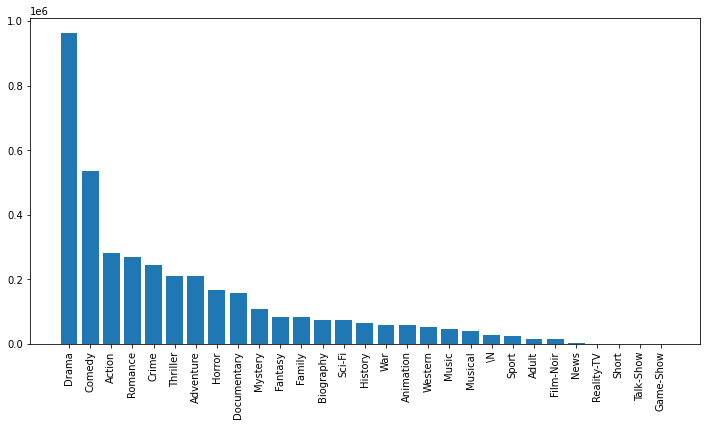

In [12]:
genre_data=pd.DataFrame.from_dict(genre_dict, orient='index',columns=['counts'])
genre_data=genre_data.reset_index(inplace=False)
genre_data = genre_data.rename(columns = {'index':'genre'}).sort_values('counts',ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(genre_data.genre,genre_data.counts)
plt.xticks(rotation=90)
plt.show()

In [13]:
top_list=title_rated[(title_rated.titleType=='movie')
            &(title_rated.averageRating>7.0)
            &(title_rated.numVotes>10000)
            &(title_rated.startYear_int>=2000)&(title_rated.startYear_int<=2023)
#             &(title_rated.region=='GB')
            &(title_rated.types=='original')         
            &(title_rated.genres.str.contains('Drama'))
#             &(title_rated.language=='en')
                    ].sort_values('averageRating', ascending=False)

top_list.head(20)
# top_list[['primaryTitle','startYear','genres','averageRating','numVotes','runtimeMinutes']].to_csv('my_favourites.csv')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes,startYear_int,concat_region_lang
2448812,tt15097216,movie,Jai Bhim,Jai Bhim,0,2021,\N,164,"Crime,Drama,Mystery",tt15097216,16,Jai Bhim,\N,\N,original,\N,1,9.4,183396,2021.0,\N \N
1882610,tt10189514,movie,Soorarai Pottru,Soorarai Pottru,0,2020,\N,153,Drama,tt10189514,15,Soorarai Pottru,\N,\N,original,\N,1,9.3,108866,2020.0,\N \N
3676110,tt8178634,movie,RRR,RRR,0,2022,\N,187,"Action,Drama",tt8178634,9,RRR,\N,\N,original,\N,1,9.2,12832,2022.0,\N \N
1933458,tt10534500,movie,#Home,#Home,0,2021,\N,158,Drama,tt10534500,7,#Home,\N,\N,original,\N,1,9.1,12110,2021.0,\N \N
3629872,tt7738784,movie,Peranbu,Peranbu,0,2018,\N,147,Drama,tt7738784,14,Peranbu,\N,\N,original,\N,1,9.1,14720,2018.0,\N \N
1537760,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",tt0468569,19,The Dark Knight,\N,\N,original,\N,1,9.1,2527610,2008.0,\N \N
3730499,tt8737152,movie,Toma,Toma,0,2021,\N,140,"Biography,Drama,Music",tt8737152,5,Toma,\N,\N,original,\N,1,9.0,10355,2021.0,\N \N
3393396,tt5813916,movie,The Mountain II,Dag II,0,2016,\N,135,"Action,Drama,War",tt5813916,3,Dag II,\N,\N,original,\N,1,9.0,107768,2016.0,\N \N
1002423,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",tt0167260,52,The Lord of the Rings: The Return of the King,\N,\N,original,\N,1,9.0,1765146,2003.0,\N \N
3204595,tt4558362,movie,Our Story,Bizim Hikaye,0,2015,\N,97,"Action,Drama",tt4558362,2,Bizim Hikaye,\N,\N,original,\N,1,9.0,18028,2015.0,\N \N


We note that most of this list of top results contains many Indian/Bollywood references. This may not be every viewers cup of tea.. And nothing in the available tables allows us to exclude movies of Indian origin.